In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.tools import plotting
import urllib.request
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器
from scipy.cluster.hierarchy import linkage, dendrogram

In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
urllib.request.urlretrieve(url, 'awabi.txt')

KeyboardInterrupt: 

In [5]:
df = pd.read_csv('awabi.txt', sep=',', header=None)

In [6]:
df.columns = ["Sex", 
              "Length",
              "Diameter",
              "Height",
              "Whole_weight",
              "Shucked_weight",
              "Viscera_weight",
              "Shell_weight",
              "Rings"]

In [7]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


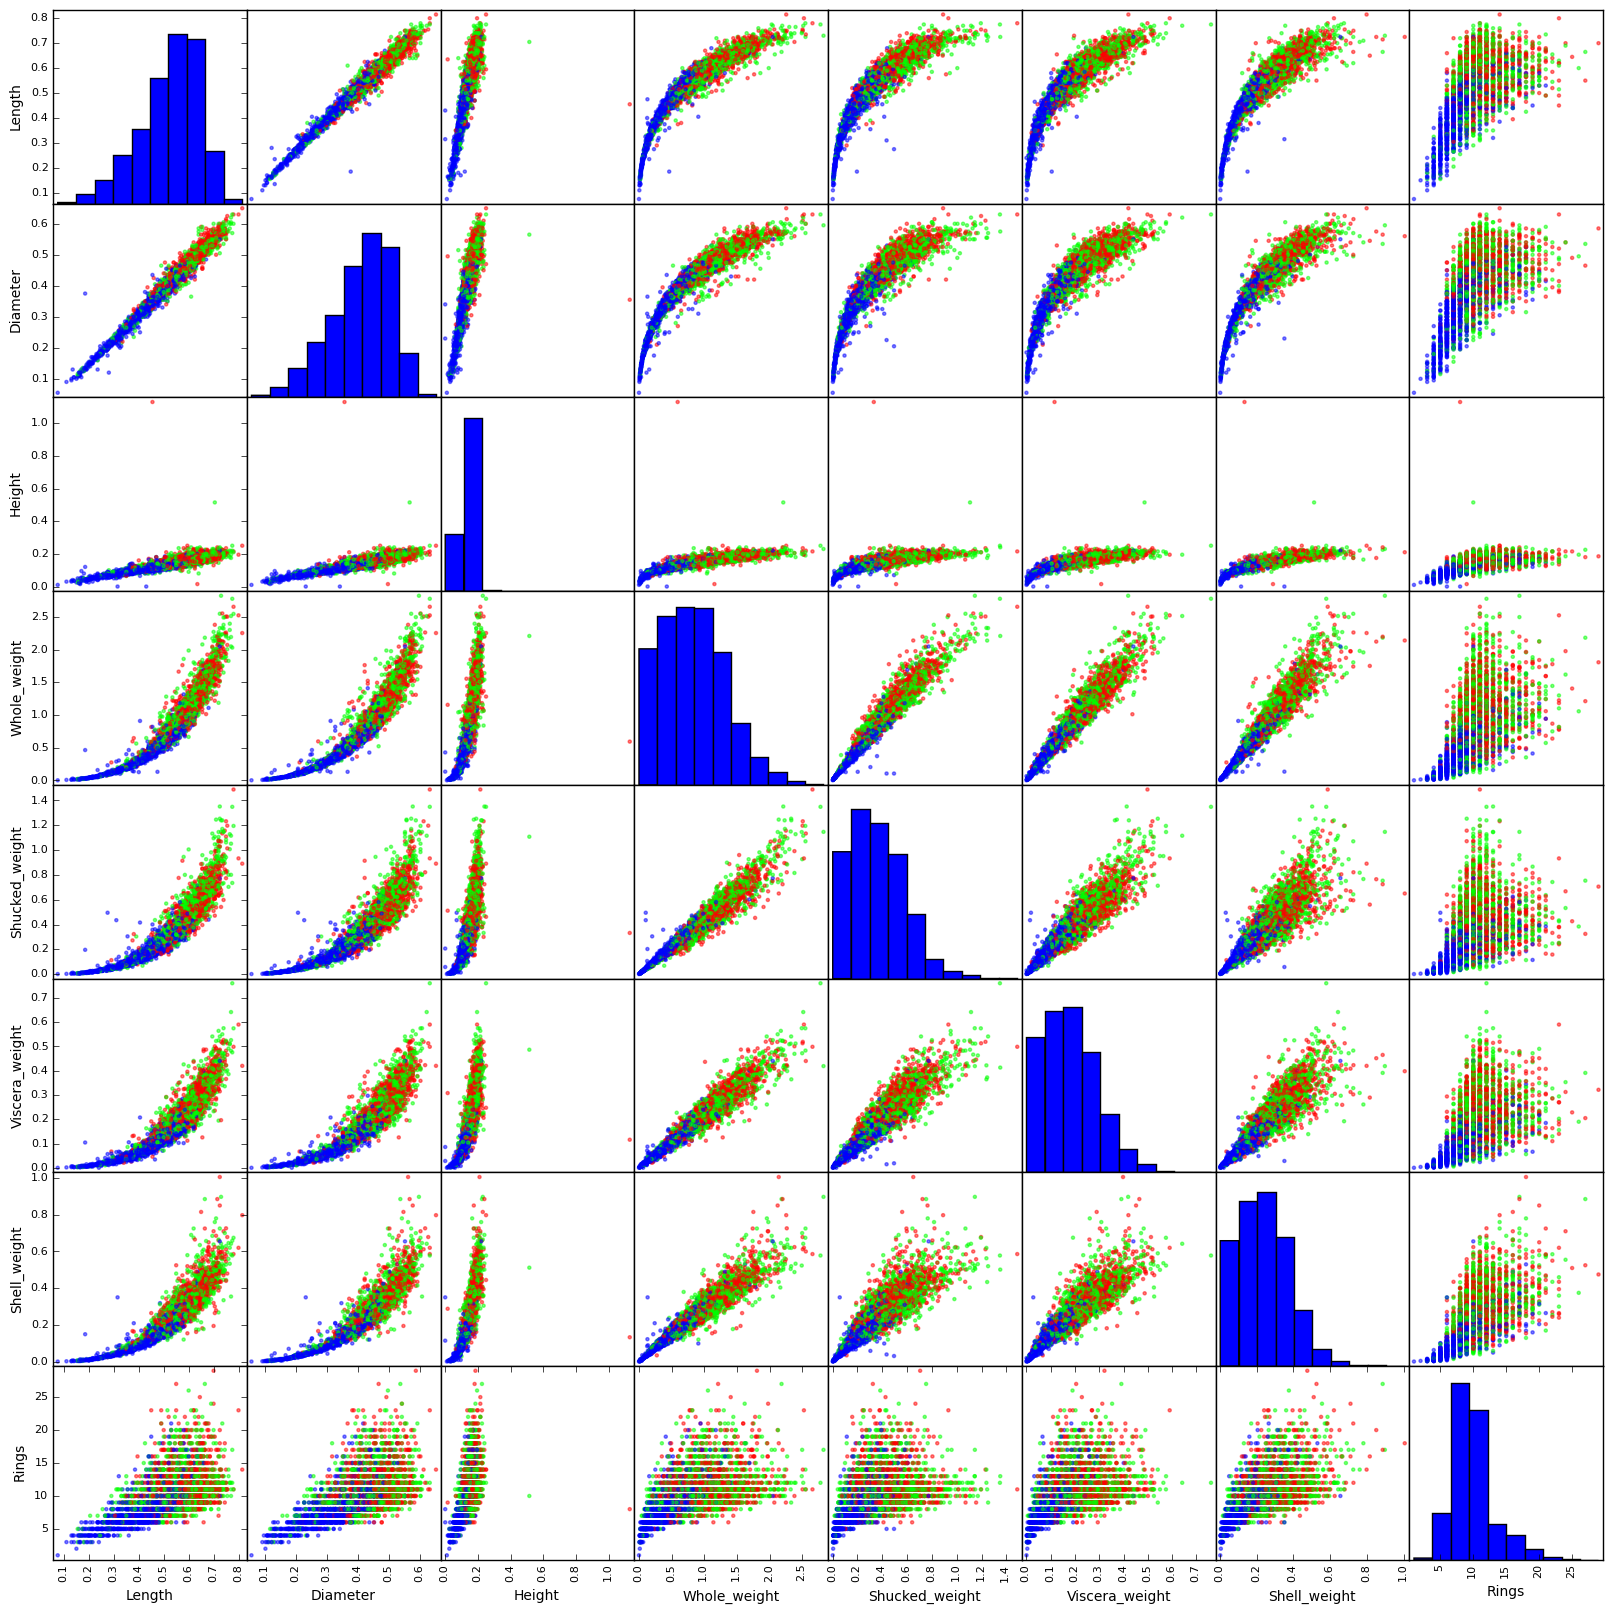

In [8]:
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, 0]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, 0])]
plotting.scatter_matrix(df.dropna(axis=1)[df.columns[:]], figsize=(20, 20), color=colors) 
plt.show()

Rings以外が正の相関を示していることがわかる。  
Ringsについてはノイズが入っているように見えるが、ここは整数しか入っていないためこのような散布図になる。  
Iの方が年齢が低く、MFの方が全体的に高い値を示している。

In [10]:
pd.DataFrame(np.corrcoef(df.dropna().iloc[:, 1:].T.as_matrix().tolist()), 
             columns=df.columns[1:], index=df.columns[1:])

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


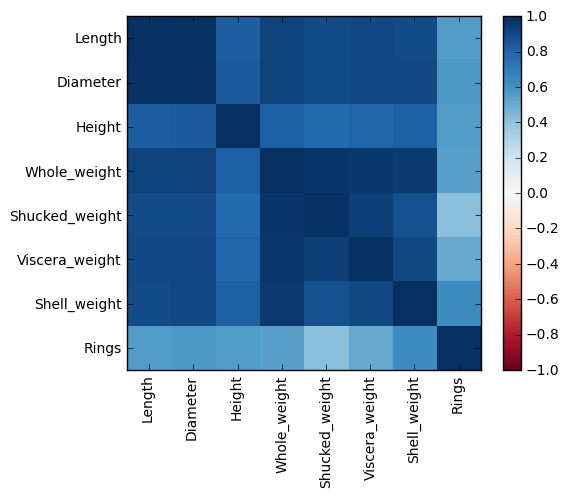

In [11]:
corrcoef = np.corrcoef(df.dropna().iloc[:, 1:].T.as_matrix().tolist())
plt.figure(figsize=(6, 5))
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.RdBu, vmin = -1, vmax = 1)
plt.colorbar()
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df.columns[1:], rotation=90)
plt.yticks(tick_marks, df.columns[1:])
plt.tight_layout()

相関係数はRingsを除いて全て高く、正である。また、Heightのみ少し低い。  
つまり、アワビの重さや大きさは全て関連しており、それらは年齢にはあまり寄らないということがわかる。

続いてPCAによる分析

In [12]:
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

In [13]:
dfs

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140,1.571355
1,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842,-0.909904
2,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114,-0.289589
3,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222,0.020568
4,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599,-0.909904
5,-0.824296,-1.087076,-1.064297,-0.973191,-0.983802,-0.940513,-0.853654,-0.599747
6,0.050027,0.071733,0.250642,-0.104493,-0.551297,-0.356647,0.654938,3.122143
7,0.174930,0.172499,-0.347058,-0.123865,-0.294497,-0.283664,0.152074,1.881513
8,-0.407952,-0.381714,-0.347058,-0.650998,-0.643655,-0.621211,-0.530384,-0.289589
9,0.216565,0.323648,0.250642,0.134093,-0.202140,-0.269980,0.583100,2.811985


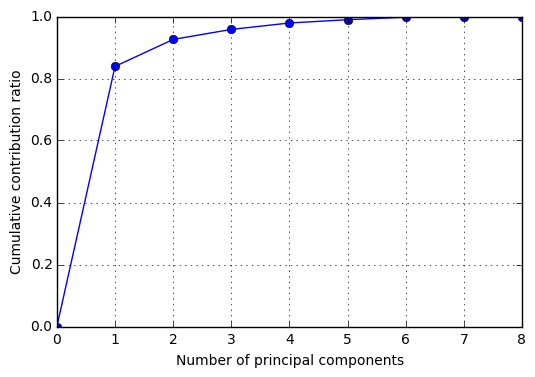

In [17]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

第三成分まででおおよそ表せていることがわかる。

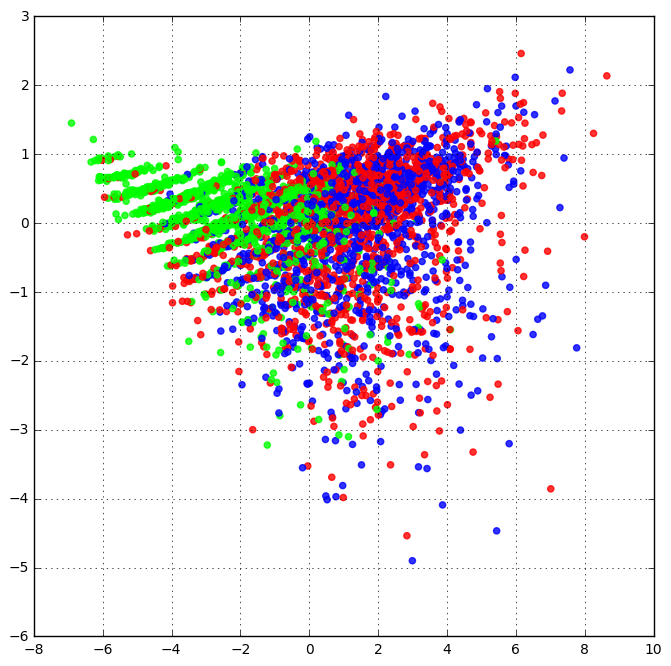

In [26]:
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, 0]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, 0])]
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], ""):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, color=colors)
plt.grid()
plt.show()

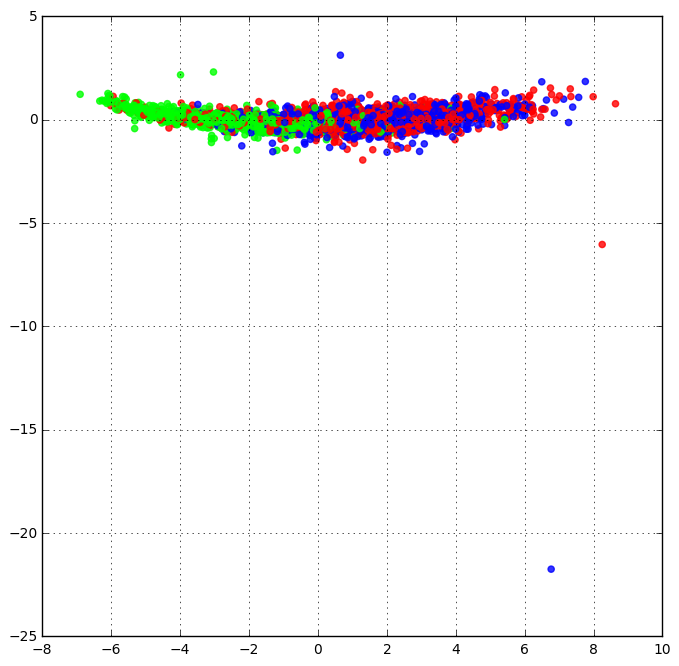

In [32]:
# 第一主成分と第三主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 2], ""):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 2], alpha=0.8, color=colors)
plt.grid()
plt.show()

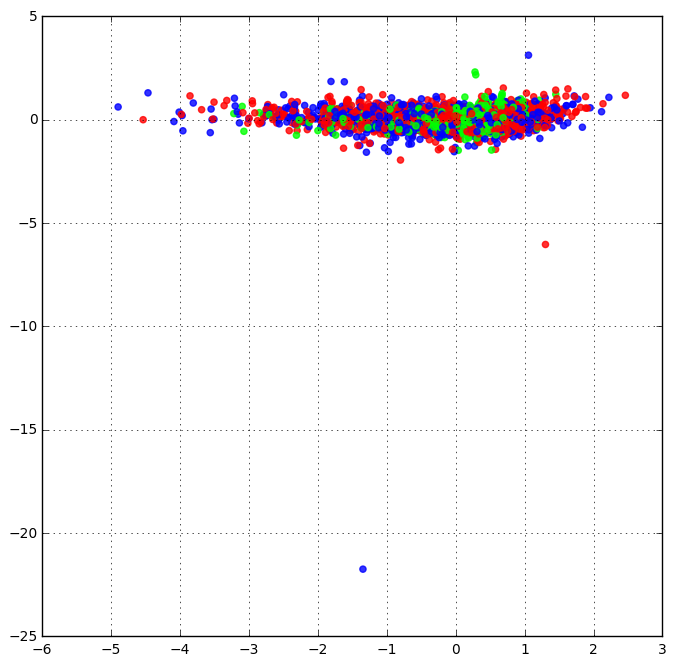

In [33]:
# 第二主成分と第三主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 1], feature[:, 2], ""):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 1], feature[:, 2], alpha=0.8, color=colors)
plt.grid()
plt.show()

全てにおいてM,F,Iをうまく分離できていないことがわかる。

今回のデータセットでは、アワビのオスメス子供はうまく分離できないことがわかった。  
年齢